# Working with GEE .tif Files

Sample notebook showing how to download .tif files from AWS S3 and then work with them in the notebook.

In [5]:
# Required imports:

import os 
import sys

sys.path.append(os.path.join("..", "..", "code"))
from aws_s3_client import S3Client
from tif_files import TifFile


BUCKET = "w210-snow-fate"
GAGE = "11266500"

DIR = os.getcwd()
TEMP_DIR = os.path.join(os.path.dirname(os.path.dirname(DIR)), "data", "temp")
if not os.path.exists(TEMP_DIR):
    os.mkdir(TEMP_DIR)

## Downloading files from S3

In [6]:
# Create a client to download from S3.
# Requires an AWS credentials JSON file to be saved at ~/.aws
s3 = S3Client(TEMP_DIR, BUCKET)

In [7]:
# Optionally get a DataFrame listing all .tif files in the S3 directory for a gage.
# (This can take a long time as there are lots of files).

# s3_df = s3.list_gee_tif_files(GAGE)

In [8]:
# Specify the filepaths of the files to download from S3:
era5_temp_s3fp = '11266500/epsg_4326__11131_95__ECMWF_ERA5_LAND_HOURLY__temperature_2m__2020_01_29.tif'
era5_prec_s3fp = '11266500/EPSG_4326__11131_95__ECMWF_ERA5_LAND_HOURLY__total_precipitation__2010_01_05.tif'
modis_s3fp = '11266500/epsg_4326__463_31__MODIS_006_MOD16A2__ET__2016_07_03.tif'

In [9]:
# Download the specified files to the local temp directory:
s3.download_to_local(era5_temp_s3fp, era5_prec_s3fp, modis_s3fp)

In [10]:
# Get the local filepaths of the downloaded files:
era5_temp_fp = os.path.join(TEMP_DIR, GAGE, era5_temp_s3fp.split("/")[-1])
era5_prec_fp = os.path.join(TEMP_DIR, GAGE, era5_prec_s3fp.split("/")[-1])
modis_fp = os.path.join(TEMP_DIR, GAGE, modis_s3fp.split("/")[-1])

## Plot the .tif data

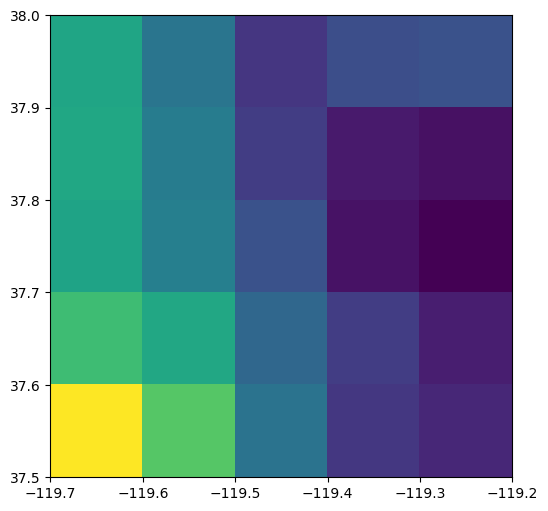

In [11]:
era5_temp_tif = TifFile(era5_temp_fp)
era5_temp_tif.plot()

In [12]:
era5_temp_tif.as_numpy

array([[266.21567, 264.1395 , 261.7723 , 262.618  , 262.72934],
       [266.2762 , 264.46957, 262.03012, 260.88168, 260.618  ],
       [266.1395 , 264.6063 , 262.7274 , 260.6512 , 260.14145],
       [267.2684 , 266.31918, 263.59653, 262.00668, 261.0145 ],
       [270.46957, 267.7313 , 264.07895, 261.81137, 261.30356]],
      dtype=float32)

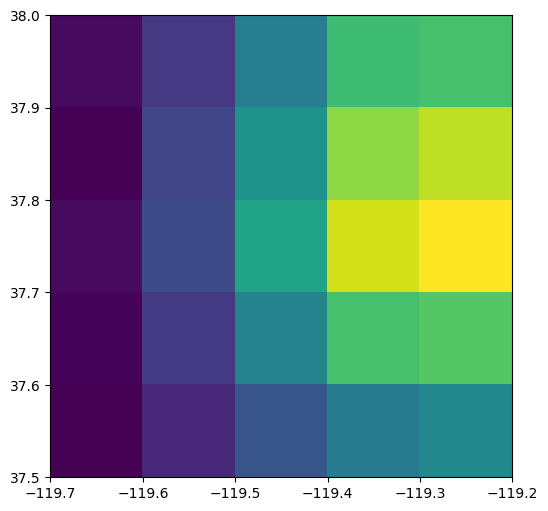

In [13]:
era5_prec_tif = TifFile(era5_prec_fp)
era5_prec_tif.plot()

In [14]:
era5_prec_tif.as_numpy

array([[1.1108816e-04, 5.2876770e-04, 1.3156682e-03, 2.1079332e-03,
        2.1754205e-03],
       [2.3543833e-05, 6.5654516e-04, 1.5827268e-03, 2.5398135e-03,
        2.7644783e-03],
       [1.1302531e-04, 7.1553886e-04, 1.7881989e-03, 2.8528869e-03,
        3.0523837e-03],
       [5.7786703e-05, 5.5320561e-04, 1.3790429e-03, 2.1748096e-03,
        2.2556484e-03],
       [3.4019351e-05, 3.6035478e-04, 8.3629787e-04, 1.2640208e-03,
        1.4336407e-03]], dtype=float32)

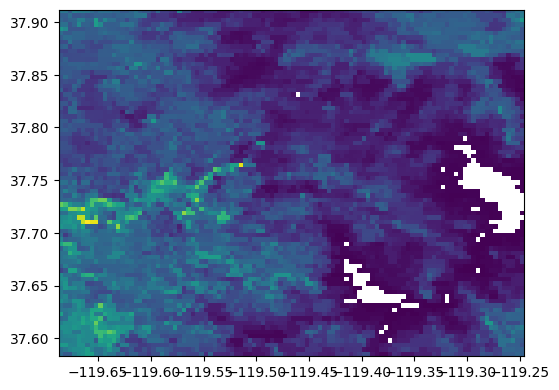

In [15]:
modis_tif = TifFile(modis_fp)
modis_tif.plot()

In [16]:
modis_tif.as_numpy

array([[137., 137., 104., ..., 115., 132., 132.],
       [106., 106., 129., ..., 135., 119., 146.],
       [114., 102., 116., ..., 135., 148., 185.],
       ...,
       [186., 187., 157., ..., 108., 107.,  89.],
       [127., 142., 158., ..., 115., 109., 109.],
       [125., 101., 101., ..., 105., 115., 109.]], dtype=float32)

## Extract metadata from .tif files

In [17]:
import rasterio as rio

with rio.open(modis_fp) as src:
    img = src.read()
    src_crs = src.crs['init'].upper()
    min_lon, min_lat, max_lon, max_lat = src.bounds

In [18]:
src_crs

'EPSG:4326'

In [19]:
min_lon, min_lat, max_lon, max_lat 

(-119.68689125540256,
 37.58294078089804,
 -119.24571830714396,
 37.91173948761908)